In [2]:
#Colb connect drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
#import thu vien
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
#Read data
df = pd.read_excel('/content/gdrive/MyDrive/Atificial Intellignet/Phân khúc khách hàng bằng RFM và KMean/data.xlsx')

In [ ]:
#In thu 10 dong du lieu
df.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Dem thu so luong dong

In [7]:
# Loai bo gia tri nan
df_not_nan = df[df['CustomerID'].notna()]
df_not_nan = df_not_nan.sample(10000, random_state=42)
df_not_nan.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom
234751,557598,22558,CLOTHES PEGS RETROSPOT PACK 24,2,2011-06-21 11:33:00,1.65,14667.0,United Kingdom
283269,561704,21533,RETROSPOT LARGE MILK JUG,1,2011-07-29 11:07:00,4.95,14606.0,United Kingdom
532936,581001,22726,ALARM CLOCK BAKELIKE GREEN,24,2011-12-07 08:07:00,3.75,12583.0,France
78561,542890,84865,NEW BAROQUE BLACK PHOTO ALBUM,2,2011-02-01 13:25:00,8.50,15311.0,United Kingdom
424855,573287,21314,SMALL GLASS HEART TRINKET POT,8,2011-10-28 14:42:00,2.10,14194.0,United Kingdom


In [20]:
#Tinhb toan RFM

#Tinh R - Recenry

#Chuyen tu string-->date
df_not_nan['InvoiceDate'] = pd.to_datetime(df_not_nan['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')

#Lay ngay lon nhat trong InvoiceDate+1
import datetime
current_date = max(df_not_nan['InvoiceDate'])+ datetime.timedelta(days = 1)

#----Tinh M - Moneytary Value
df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']

#Group by CustomerID de tinh R,F,M

df_customers = df_not_nan.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date- x.max()).days,
     'InvoiceNo' : 'count',
     'TotalPay':'sum'
    }
)


In [21]:
df_customers.head()

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12347.0,39,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,72,5,80.85
12354.0,232,2,33.30


In [66]:
df_customers.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequery','TotalPay':'MonetaryValue'}, replace=True)

,Recency,Frequery,MonetaryValue
CustomerID,,,
12347.0,39,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,72,5,80.85
12354.0,232,2,33.30
...,...,...,...
18265.0,72,2,39.60
18272.0,2,11,206.17
18274.0,18,2,-4.65


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

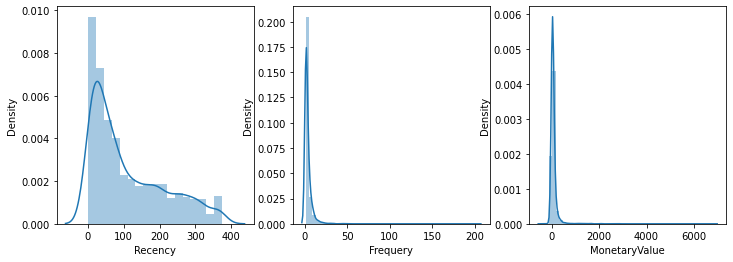

In [67]:
# Ve phan phoi de kiem tra

fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(df_customers['Recency'], ax = ax[0])
sns.distplot(df_customers['Frequery'], ax = ax[1])
sns.distplot(df_customers['MonetaryValue'], ax = ax[2])
plt.show()

In [76]:
from scipy import stats
def analyze_skewness(x):
  fig, ax=plt.subplots(2,2,figsize=(5,5))
  sns.distplot(df_customers[x], ax=ax[0,0])
  sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
  sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0])
  sns.distplot(stats.boxcox(df_customers[x])[0],ax=ax[1,1])
  plt.tight_layout()
  plt.show()

  print(df_customers[x].skew().round(2))
  print(np.log(df_customers[x]).skew().round(2))
  print(np.sqrt(df_customers[x]).skew().round(2))
  print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

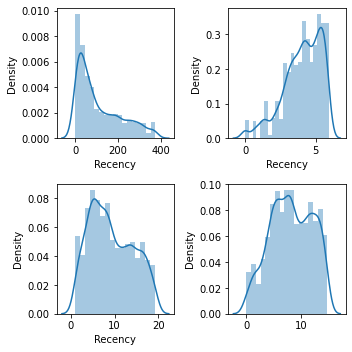

0.93
-0.83
0.31
-0.11


In [77]:
analyze_skewness('Recency')

In [82]:
#Tien hanh transform du lieu

df_customers.head()

,Recency,Frequery,MonetaryValue
CustomerID,,,
12347.0,39,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,72,5,80.85
12354.0,232,2,33.30


In [97]:
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df_customers['Recency'])[0]
df_customers_t['Frequery'] = stats.boxcox(df_customers['Frequery'])[0]
df_customers_t['MonetaryValue'] = pd.Series(np.cbrt(df_customers['MonetaryValue'])).values
df_customers_t.head(10)

,Recency,Frequery,MonetaryValue
0,6.285050,1.127547,5.107026
1,12.822038,0.591193,4.944452
2,4.514540,0.591193,6.787853
3,8.093846,1.127547,4.324076
4,12.507538,0.591193,3.217225
5,5.842330,1.017445,6.681810
6,10.722280,0.000000,4.308869
7,7.368815,0.857267,3.794637
8,9.629931,0.857267,3.220442
9,6.617486,0.000000,2.571282


In [98]:
# Tien hanh scale du lieu

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform(df_customers_t)


In [94]:
pd.DataFrame(df_customers_t).head()

,0,1,2
0,-0.496913,1.012426,0.876127
1,1.234593,-0.017412,0.775476
2,-0.965883,-0.017412,2.007216
3,-0.017802,1.012426,0.406723
4,1.151289,-0.017412,-0.186307


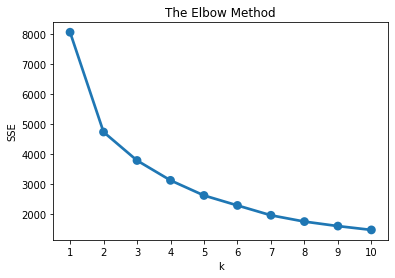

In [99]:
# Dua du lieu vao KNN

# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [100]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_customers_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [101]:
df_customers['Cluster'] = model.labels_
df_customers.head()

,Recency,Frequery,MonetaryValue,Cluster
CustomerID,,,,
12347.0,39,5,133.20,1
12348.0,249,2,120.88,0
12349.0,19,2,312.75,1
12352.0,72,5,80.85,1
12354.0,232,2,33.30,0


In [103]:
df_customers.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequery':'mean',
        'MonetaryValue':'mean'
    }
).round(2)

,Recency,Frequery,MonetaryValue
Cluster,,,
0,226.41,1.64,28.69
1,45.59,7.71,165.79
2,46.82,1.61,21.51
